In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib2tikz import save as tikz_save
import scipy.stats as stats


dyn_schaffers = "./Schaffers/dyn/results/"
dyn_katsuura = "./Katsuura/dyn/results/"
b_katsuura = "./Katsuura/baseline/"
b_schaffers = "./Schaffers/baseline/"
cr_katsuura = "./Katsuura/crowding/final/"
cr_schaffers = "./Schaffers/crowding/final2/"

def readall100(directory):
    filenames = os.listdir(directory)
    #this part is just to get the number of generations etc.
    with open(directory+filenames[0]) as f:
        content = f.readlines()
        number_of_gen = len(content)-2 #NUMBER OF GENERATIONS
        allfitnessdata = np.zeros(number_of_gen) 
        allavgdcn = np.zeros(number_of_gen)
        mbf = []
    
    #real deal 
    for name in filenames:
        with open(directory+name) as f:
            c = f.readlines()
            finalscore = c[-2].split(" ")[-1] #not actually used yet
            rawdata = c[:-2]
            bestfitness, avgdcn = [], []
            for item in rawdata:
                genData = item.strip().split(" ")
                bestfitness += [float(genData[0])]
                avgdcn += [float(genData[1])]
        mbf += [float(finalscore)]
        allfitnessdata = np.sum((allfitnessdata,np.array(bestfitness)),axis=0)
        allavgdcn = np.sum((allavgdcn,np.array(avgdcn)),axis=0)

    n = len(filenames)
    avgbestfitness = np.divide(allfitnessdata,n)
    avgavgdcn = allavgdcn / n
    return mbf, avgbestfitness, avgavgdcn

mbf, avgbestfitness, avgavgdcn = readall100(dyn_katsuura)
mbf1, avgbestfitness1, avgavgdcn1 = readall100(b_katsuura)
mbf2, avgbestfitness2, avgavgdcn2 = readall100(cr_katsuura)
plt.show()


9.120835215789349 0.8690937556184859
5.392720319062084 2.998227834194993
5.989297694795007 1.7035666518321542
3.9018163586953474


F_onewayResult(statistic=94.17637973857055, pvalue=2.1124843757562896e-32)

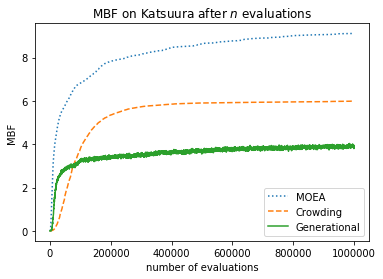

In [17]:
plt.plot(np.arange(len(avgbestfitness))*130, avgbestfitness, label= "MOEA", linestyle=":")
plt.plot(np.arange(len(avgbestfitness2))*2000, avgbestfitness2, label= "Crowding", linestyle="--")
plt.plot(np.arange(len(avgbestfitness1))*120, avgbestfitness1, label= "Generational")
plt.xlabel("number of evaluations")
plt.ylabel("MBF")
plt.legend()
plt.title("MBF on Katsuura after $n$ evaluations")
plt.savefig("")

print(np.average(mbf), np.std(mbf))
print(np.average(mbf1), np.std(mbf1))
print(np.average(mbf2), np.std(mbf2))

print(avgbestfitness1[-1])
stats.f_oneway(mbf,mbf1, mbf2)

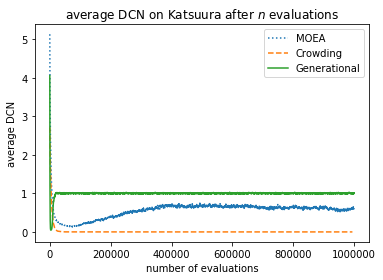

In [15]:
plt.plot(np.arange(len(avgavgdcn))*130, avgavgdcn, label = "MOEA", linestyle=":")
plt.plot(np.arange(len(avgavgdcn2))*2000, avgavgdcn2, label = "Crowding", linestyle="--")
plt.plot(np.arange(len(avgavgdcn1))*120, avgavgdcn1, label = "Generational")
plt.title("average DCN on Katsuura after $n$ evaluations")
plt.ylabel("average DCN")
plt.xlabel("number of evaluations")
plt.legend()

multi: 9.946540041464846 0.16481678057425322
baseline: 9.999326980843051 0.0034168024280488186
crowding: 9.828886773323422 0.22333460534404712


F_onewayResult(statistic=17.787317906181965, pvalue=3.756637433744049e-05)

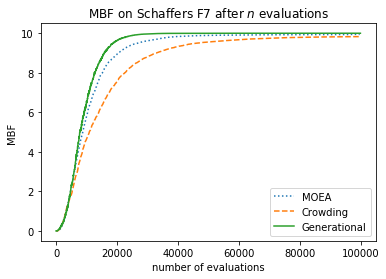

In [19]:
mbf, avgbestfitness, avgavgdcn = readall100(dyn_schaffers)
mbf2, avgbestfitness2, avgavgdcn2 = readall100(cr_schaffers)
mbf1, avgbestfitness1, avgavgdcn1 = readall100(b_schaffers)

plt.plot(np.arange(len(avgbestfitness))*150, avgbestfitness, label= "MOEA", linestyle=":")
plt.plot(np.arange(len(avgbestfitness2))*150, avgbestfitness2, label="Crowding", linestyle="--")
plt.plot(np.arange(len(avgbestfitness1))*50, avgbestfitness1, label= "Generational")
plt.xlabel("number of evaluations")
plt.ylabel("MBF")
plt.title("MBF on Schaffers F7 after $n$ evaluations")
plt.legend()

print("multi:", np.average(mbf), np.std(mbf))
print("baseline:", np.average(mbf1), np.std(mbf1))
print("crowding:", np.average(mbf2), np.std(mbf2))

stats.f_oneway(mbf, mbf2)

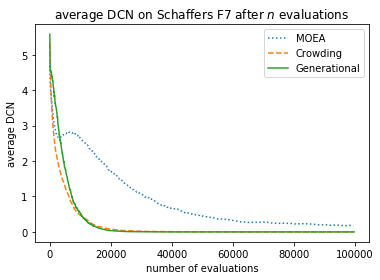

In [20]:
plt.plot(np.arange(len(avgavgdcn))*150, avgavgdcn, label = "MOEA", linestyle=":")
plt.plot(np.arange(len(avgavgdcn2))*150, avgavgdcn2, label = "Crowding", linestyle="--")
plt.plot(np.arange(len(avgavgdcn1))*50, avgavgdcn1, label = "Generational")

plt.title("average DCN on Schaffers F7 after $n$ evaluations")
plt.ylabel("average DCN")
plt.xlabel("number of evaluations")
plt.legend()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

popSize=np.array([150],int)
sigma=np.array([0.03])
selPressure=np.array([2.0])
epsilons= np.array([0.0,'0.00001','0.0001', 0.001])
simltnSize = 20
dir = "./Schaffers/dyn/" 
format = ".txt"
combinations = [(psize, s, sp, eps) for psize in popSize for s in sigma[:2] for sp in selPressure[:2] for eps in epsilons]
score = dict()
for psize, s, sp, eps in combinations:
    som = 0
    for j in range(1,simltnSize+1):
        dirctry = dir + "Size_"+ str(psize) + "_Sigma_" + str(s) + "_SelPressure_" + str(sp) + "_Epsilon_"+ str(eps) + "_" + str(j)+format
        lines = np.loadtxt(dirctry, comments="R", delimiter=" ", unpack=False, usecols=1)
        som += lines
    score[(psize, s, sp, eps)] = som/simltnSize

maxparams = sorted(score, key=lambda key: score[key], reverse=True)
pprint(score)

{(150, 0.03, 2.0, '0.0'): 9.877687078924854,
 (150, 0.03, 2.0, '0.00001'): 9.943395322896421,
 (150, 0.03, 2.0, '0.0001'): 9.98289909015487,
 (150, 0.03, 2.0, '0.001'): 9.883824448230616}


#first run Schaffers
popSize=np.array([50, 75, 100, 125, 150, 175, 200],int)
sigma=np.array([0.001, 0.005, 0.01, 0.05])
selPressure=np.array([1.0, 1.5, 1.8, 2.0])
simltnSize = 5
dir = "./Schaffers/dyn/" 
#best = (150,0.05,2.0) = 9.97

#second run Schaffers
popSize=np.array([125, 150, 175, 200],int)
sigma=np.array([0.01, 0.03, 0.05, 0.07, 0.09])
selPressure=np.array([1.8, 1.9, 2.0])
simltnSize = 10
dir = "./Schaffers/dyn/fine/" 
#best = (150,0.03,2.0,0.0001) = 9.97

#first run Katsuura
popSize=np.array([50, 100, 150, 200],int)
sigma=np.array([0.0, 0.001, 0.005, 0.01, 0.05])
selPressure=np.array([1.5,1.8,2.0])
simltnSize = 2
dir = "./Katsuura/dyn/" 

#second run Katsuura
popSize=np.array([125, 150, 175, 200],int)
sigma=np.array([0.001, 0.005, 0.01])
selPressure=np.array([1.7, 1.9])
epsilons= np.array([0.001, 0.0001, 0.0005])
simltnSize = 5
dir = "./Katsuura/dyn/varyeps/" 
#best = (125, 0.005, 1.7, 0.0001) = 9.74 or (150, 0.005, 1.9, 0.0001) = 9.68
##early stop because popsize 200 does not help

#third run Katsuura

popSize=np.array([130, 150, 180],int)
sigma=np.array([0.001, 0.005, 0.01])
selPressure=np.array([1.8])
epsilons= np.array([0.0001])
simltnSize = 20
dir = "./Katsuura/dyn/fine/" 
#best = ((130, 0.005, 1.8, 0.0001), 9.382549394405771),((150, 0.01, 1.8, 0.0001), 9.36692030561646),

#last run Katsuura
popSize=np.array([130],int)
sigma=np.array([0.005, 0.01])
selPressure=np.array([1.7 1.8])
epsilons= np.array([0.00001, 0.0001])
simltnSize = 50
#best = (130, 0.01, 1.8, '0.0001'), 9.256192336913564)